In [ ]:
# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
# Perform following tasks:
# 1. Pre-process the dataset.
# 2. Identify outliers.
# 3. Check the correlation.
# 4. Implement linear regression and random forest regression models.
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
# Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv("./uber.csv")

In [31]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [33]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [34]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [35]:
df.dropna(inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x17a0196d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17a019950>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a019590>],
 'medians': [<matplotlib.lines.Line2D at 0x17a019bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a019d10>],
 'means': []}

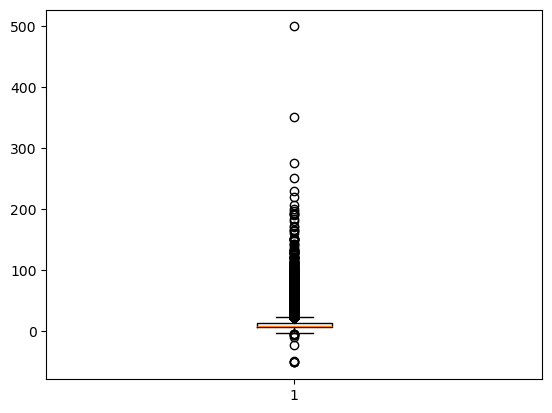

In [36]:
plt.boxplot(df['fare_amount'])

In [37]:
q_low = df["fare_amount"].quantile(0.01)
q_high = df["fare_amount"].quantile(0.99)

In [38]:
print(q_low, q_high)

3.3 53.3


In [39]:
df = df[(df["fare_amount"] < q_high) & (df["fare_amount"] > q_low)]

In [40]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [51]:
df.corr(numeric_only = True)

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,-0.000339,-0.000209,-0.000028,-0.000107,0.000647,0.002241
fare_amount,-0.000339,1.000000,0.006534,-0.004843,0.006012,-0.007651,0.012145
pickup_longitude,-0.000209,0.006534,1.000000,-0.810943,0.832846,-0.846712,-0.000737
pickup_latitude,-0.000028,-0.004843,-0.810943,1.000000,-0.773097,0.697275,-0.001288
dropoff_longitude,-0.000107,0.006012,0.832846,-0.773097,1.000000,-0.914509,-0.000020
dropoff_latitude,0.000647,-0.007651,-0.846712,0.697275,-0.914509,1.000000,-0.000537
passenger_count,0.002241,0.012145,-0.000737,-0.001288,-0.000020,-0.000537,1.000000


In [52]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(["fare_amount", "key", "pickup_datetime"], axis = 1)
y = df["fare_amount"]

In [ ]:
print(x.dtypes)

Unnamed: 0             int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [ ]:
predict = lrmodel.predict(x_test)
print(predict)

[10.891742   10.88892436 10.88773754 ... 10.88986624 10.96653319
 10.88957154]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)

In [ ]:
rfrmodel.fit(x_train, y_train)

RandomForestRegressor(random_state=101)

In [ ]:
rfrPredict = rfrmodel.predict(x_test)
print(rfrPredict)

[ 6.817  6.154 10.035 ...  9.904  9.667 16.573]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
lrmodelmse = np.sqrt(mean_squared_error(predict, y_test))
rfrmodelmse = np.sqrt(mean_squared_error(rfrPredict, y_test))

In [ ]:
print("LR (MSE) :", lrmodelmse)
print("RFR (MSE):", rfrmodelmse)

LR (MSE) : 8.064306772602377
RFR (MSE): 3.7011409723760056
